In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

###### Color list to sort

In [2]:
#rgb color_list
col_list = [(12, 154, 220), (75, 104, 156), (247, 187, 11), (3, 3, 3), (209, 216, 109), (232, 109, 116), (9, 144, 59), (191, 198, 226), (236, 125, 6), (249, 211, 10), (187, 63, 53), (149, 202, 179), (140, 171, 155), (85, 138, 168), (238, 177, 148), (212, 212, 9), (22, 139, 161), (132, 178, 68), (240, 176, 176), (31, 74, 147), (255, 255, 255), (93, 188, 210)]

#cast rgb color form range [0,255] to [0,1]
col_list = [(c[0]/255, c[1]/255, c[2]/255) for c in col_list]

print("Number of colors:",len(col_list))

Number of colors: 22


In [3]:
#Label associated to the colors (in this case i'm using name of films)

film_list = ["nausica", "laputa", "totoro", "lucciole", "kiki", "pioggia di ricordi",
             "porco rosso", "si sente il mare", "pom poko", "sospiri cuore", "mononoke",
             "yamada", "città incantata", "ricompensa gatto", "howl", "terramare", "ponyo",
             "arrietty", "collina papaveri", "si alza il vento", "principessa splendente", "marnie"]

In [4]:
film_to_remove = ["nausica", "howl"]

for to_remove in film_to_remove:
    idx = film_list.index(to_remove)
    film_list.pop(idx)
    col_list.pop(idx)

Text(0.5, 1.0, 'Colors NOT sorted')

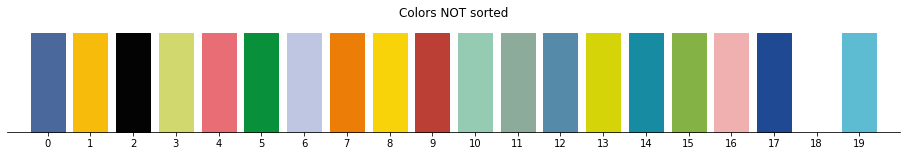

In [5]:
#from colorsys import hls_to_rgb

plt.figure(figsize=(16,2))
ax = plt.subplot(111)
ax.set_ylim([5,5.4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_xticks(range(len(col_list)))

for i in range(len(col_list)):
    clr = col_list[i]
    
    ax.scatter([i], [5.3], c=clr, s=1200, marker="s", label=film_list[i])
    ax.scatter([i], [5.2], c=clr, s=1200, marker="s",)
    ax.scatter([i], [5.1], c=clr, s=1200, marker="s")
    ax.scatter([i], [5.0], c=clr, s=1200, marker="s")
    
    
plt.title("Colors NOT sorted")

###### Convert RGB colors to LAB

In [6]:
from skimage import io, color, data

rgb_list = np.array(col_list)
rgb_list = np.expand_dims(rgb_list, axis=0)

lab_list = color.rgb2lab(rgb_list)[0]

###### Sorting

In [31]:
from colormath.color_objects import LabColor

#Different function to compute the distance between 2 color
from colormath.color_diff import delta_e_cie1976
from colormath.color_diff import delta_e_cie2000

curr_color = 16
l = list(range(len(lab_list)))
sorted_color=[]

while (len(l)!=1):
    l.remove(curr_color)
    sorted_color.append(curr_color)
    
    color1 = LabColor(lab_l=lab_list[curr_color][0],
                      lab_a=lab_list[curr_color][1],
                      lab_b=-lab_list[curr_color][2])
    dist = []
    for j in l:
        color2 = LabColor(lab_l=lab_list[j][0],
                          lab_a=lab_list[j][1],
                          lab_b=-lab_list[j][2])
        
        delta_e = delta_e_cie2000(color1, color2) # Change here the function to compute the difference
        dist.append(delta_e)
        
    min_pos = np.argmin(dist)
    curr_color = l[min_pos]
    
sorted_color.append(l[0])
print(sorted_color, len(sorted_color))

[16, 4, 9, 7, 1, 8, 3, 13, 15, 5, 11, 10, 19, 14, 12, 0, 17, 2, 6, 18] 20


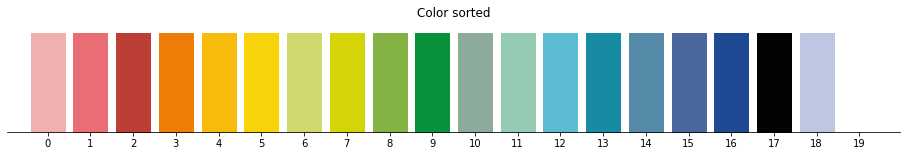

In [32]:
fig = plt.figure(figsize=(16,2))
ax = plt.subplot(111)
ax.set_ylim([5,5.4])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_xticks(range(len(col_list)))

for i in range(len(col_list)):
    clr = col_list[sorted_color[i]]
    
    ax.scatter([i], [5.3], c=clr, s=1200, marker="s", label=film_list[sorted_color[i]])
    ax.scatter([i], [5.2], c=clr, s=1200, marker="s",)
    ax.scatter([i], [5.1], c=clr, s=1200, marker="s")
    ax.scatter([i], [5.0], c=clr, s=1200, marker="s")

ax.set_title("Color sorted")
plt.show()

In [22]:
for c in sorted_color:
    print(film_list[c])

collina papaveri
pioggia di ricordi
mononoke
pom poko
totoro
sospiri cuore
kiki
terramare
arrietty
porco rosso
città incantata
yamada
marnie
ponyo
ricompensa gatto
laputa
si alza il vento
lucciole
si sente il mare
principessa splendente
